In [2]:
import pandas as pd 
import datetime
from stockai import Stock
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr

%matplotlib inline

In [5]:
ticker = 'TSLA'

# Download historical data for required stocks (5 years)
ohlcv = pdr.get_data_yahoo(ticker, datetime.date.today() - datetime.timedelta(1825), datetime.date.today())

ohlcv.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-22,768.500000,710.200012,762.640015,714.500000,37011700.0,714.500000
2021-02-23,713.609985,619.000000,662.130005,698.840027,66397000.0,698.840027
2021-02-24,745.000000,694.169983,711.849976,742.020020,36677100.0,742.020020
2021-02-25,737.210022,670.580017,726.150024,682.219971,38619900.0,682.219971
2021-02-26,706.700012,659.510010,700.000000,675.500000,41011300.0,675.500000


In [4]:
# Calculate True Range & Average True Range (ATR)
"""
- The average true range (ATR) is a market volatility indicator used in technical analysis.
- It is typically derived from the 14-day simple moving average of a series of true range indicators.
- The ATR was originally developed for use in commodities markets but has since been applied to all types of securities.
- The ATR is commonly used as an exit method that can be applied no matter how the entry decision is made.
"""
def ATR(DF, n):
    df = DF.copy()
    df['H-L'] = abs(df['High'] - df['Low'])
    df['H-PC'] = abs(df['High'] - df['Adj Close'].shift(1))
    df['L-PC'] = abs(df['Low'] - df['Adj Close'].shift(1))
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L', 'H-PC', 'L-PC'], axis=1)
    return df2

In [18]:
atr = ATR(ohlcv, 20)
atr.tail()

,High,Low,Open,Close,Volume,Adj Close,TR,ATR
Date,,,,,,,,
2021-02-22,768.500000,710.200012,762.640015,714.500000,37011700.0,714.500000,71.099976,37.142007
2021-02-23,713.609985,619.000000,662.130005,698.840027,66397000.0,698.840027,95.500000,38.838007
2021-02-24,745.000000,694.169983,711.849976,742.020020,36677100.0,742.020020,50.830017,40.164505
2021-02-25,737.210022,670.580017,726.150024,682.219971,38619900.0,682.219971,71.440002,42.094504
2021-02-26,706.700012,659.510010,700.000000,675.500000,41011300.0,675.500000,47.190002,41.296005


<AxesSubplot:xlabel='Date'>

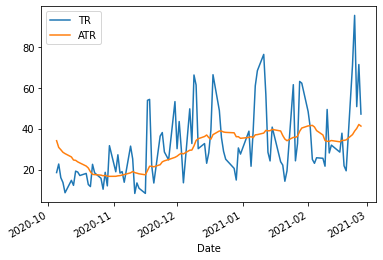

In [21]:
atr.iloc[-100:,[-2, -1]].plot()

In [9]:
# Calculate Bollinger Bands
"""
- Bollinger Bands® are a technical analysis tool developed by John Bollinger 
for generating oversold or overbought signals.
- There are three lines that compose Bollinger Bands: A simple moving average (middle band) 
and an upper and lower band.
- The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average, 
but can be modified.
"""
def BollBnd(DF, n):
    df = DF.copy()
    df['MA'] = df['Adj Close'].rolling(n).mean()
    df['BB_up'] = df['MA'] + 2*df['MA'].rolling(n).std()
    df['BB_dn'] = df['MA'] - 2*df['MA'].rolling(n).std()
    df['BB_width'] = df['BB_up'] - df['BB_dn']
    df.dropna(inplace=True)
    return df

<AxesSubplot:xlabel='Date'>

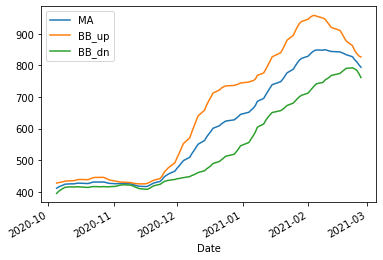

In [15]:
bb = BollBnd(ohlcv, 20)
# Plot the last 100 items
bb.iloc[-100:,[-4,-3,-2]].plot()